In this notebook we train a decison tree to classify words with `ie` from words with the letters `ei` with scikit-learn

We'll then visualize it with graphviz

In [ ]:
from sklearn import tree
import graphviz 

Below we download the data

In [ ]:
!wget https://raw.githubusercontent.com/mlittmancs/great_courses_ml/master/data/ei.txt
!wget https://raw.githubusercontent.com/mlittmancs/great_courses_ml/master/data/ie.txt

--2020-05-26 10:20:10--  https://raw.githubusercontent.com/mlittmancs/great_courses_ml/master/data/ei.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2470 (2.4K) [text/plain]
Saving to: ‘ei.txt.1’

ei.txt.1            100%[===================>]   2.41K  --.-KB/s    in 0s      

2020-05-26 10:20:10 (35.5 MB/s) - ‘ei.txt.1’ saved [2470/2470]

--2020-05-26 10:20:11--  https://raw.githubusercontent.com/mlittmancs/great_courses_ml/master/data/ie.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6272 (6.1K) [text/plain]
Saving to: ‘ie.txt.1

Here we define some auxilliary functions:

- `features` processes the words and extracts information about them, such as the number of sylables and pronounciation
- `featurenames` describes the features listed in `features`

In [ ]:
# Define some auxillary functions

def features(wordline):
    vector = []
    if "ie" in wordline[0]: loc = wordline[0].index("ie")
    else: loc = wordline[0].index("ei")
    # pronounced as one syllable
    vector = vector + [wordline[1][loc] == '-' or wordline[1][loc+1] == '-']
    # silent
    vector = vector + [wordline[1][loc] == '-' and wordline[1][loc+1] == '-']
    # two syllables
    vector = vector + [wordline[1][loc] != '-' and wordline[1][loc+1] != '-']
    # pronunciation
#    for pro in ["--", "-I", "A-", "E-", "I-", "e-", "ei", "i-", "iA", "iI", "ix", "x-", "-E",
#                "-a", "-e", "-x", "-y", "AE", "Ai", "Ax", "Ix", "Y-", "iE", "ii", "y-", "yE",
#                "yI", "ye", "yx"]:
    # two syllable pronunciation
    for pro in ["ei", "iA", "iI", "ix", "AE", "Ai", "Ax", "Ix", "iE", "ii", "yE", "yI", "ye", "yx"]:
        vector = vector + [wordline[1][loc:(loc+2)] == pro]
    # two syllable pronunciation
    for pro in ["I", "A", "E", "e", "i", "x", "a", "y", "Y"]:
        vector = vector + [wordline[1][loc:(loc+2)] == pro+"-" or wordline[1][loc:(loc+2)] == "-"+pro]
    for let in "abcdefghijklmnopqrstuvwxyz":
    # immediate preceeding, before
        if loc > 0: vector = vector + [wordline[0][loc-1] == let]
        else: vector = vector + [False]
        vector = vector + [let in wordline[0][0:loc]]
        # immediate following, after
        if loc < len(wordline[0])-2: vector = vector + [wordline[0][loc+2] == let]
        else: vector = vector + [False]
        vector = vector + [let in wordline[0][(loc+2):]]
        # in word at all
        vector = vector + [let in wordline[0][(loc+2):]]
    return(vector)

def featurenames():
    vector = []
    # pronounced as one syllable
    vector = vector + ["one syllable?", "silent?", "two syllables?"]
    # pronunciation
    for pro in ["ei", "iA", "iI", "ix", "AE", "Ai", "Ax", "Ix", "iE", "ii", "yE", "yI", "ye", "yx"]:
        vector = vector + ["sounds like " + pro + "?"]
    # two syllable pronunciation
    for pro in ["I", "A", "E", "e", "i", "x", "a", "y", "Y"]:
        vector = vector + ["sounds like " + pro + "?"]
    for let in "abcdefghijklmnopqrstuvwxyz":
        # immediate preceeding, before
        vector = vector + ["immediately after " + let + "?", "after " + let + "?"]
        # immediate following, after
        vector = vector + ["immediately before " + let + "?", "before " + let + "?"]
        # in word at all
        vector = vector + ["word contains " + let + "?"]
    return(vector)

We'll now combine these functions to load the data into multiple lists:

- `dat` contains the information about each word, described in the `features` function
- `labs` labels if the word uses `ie` or `ei`
- `words` includes each actual word
- `pros` describes the pronouciation of each word 

In [ ]:
# Putting together the data set:

dat = []
labs = []
words = []
pros = []
for file in ["ie", "ei"]:
 with open(file+".txt", "r") as f:
   data = f.readlines()
   for line in data:
    wordline = line.split()
    dat = dat + [features(wordline)]
    labs = labs + [["ie" in wordline[0]]]
    words = words + [wordline[0]]
    pros = pros + [wordline[1]]

We can now train the decision tree classifer using 8 decision rules and calculate the number of words we get correct with this model

In [ ]:
# Set up the learner and run it on the data, then compute the accuracy and print it
clf = tree.DecisionTreeClassifier(max_leaf_nodes=8)
clf = clf.fit(dat, labs)
correct = 0
for i in range(len(words)):
    if clf.predict([features([words[i], pros[i]])]) == labs[i]: correct = correct + 1
print(correct)

425


We can now extract the names of the features to use in the diagram of the decision tree and plot the diagram

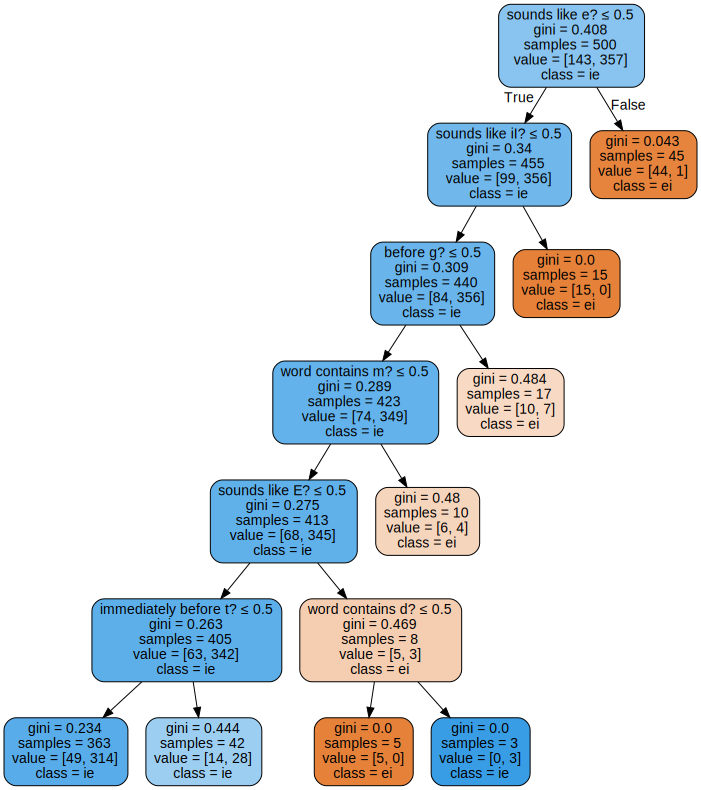

In [ ]:
feats = featurenames()

# Draw the tree!


# dot_data = tree.export_graphviz(clf, out_file=None) 
# graph = graphviz.Source(dot_data) 
# graph.render("iris") 
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=feats,  
                      class_names=["ei","ie"],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph
